# Travail 1
> Victor Ludvig

> J'utilise un wrapper python de Weka. La configuration peut prendre un certain temps. <br>
Exemples d'utilisation du wrapper: ['https://fracpete.github.io/python-weka-wrapper/examples.html]('https://fracpete.github.io/python-weka-wrapper/examples.html)

In [109]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier, Evaluation
import weka.plot.graph as graph 
from weka.core.converters import Loader
import pandas as pd
import matplotlib
import weka.plot.classifiers as plcls
from weka.classifiers import PredictionOutput
from weka.core.classes import Random

In [110]:
jvm.start()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


#### Chargement des données

In [111]:
loader = Loader(classname="weka.core.converters.ArffLoader")
data_cars = loader.load_file('cars.arff')
data_cars.class_is_last()
print(data_cars)

@relation car

@attribute buying {vhigh,high,med,low}
@attribute maint {vhigh,high,med,low}
@attribute doors {2,3,4,5more}
@attribute persons {2,4,more}
@attribute lug_boot {small,med,big}
@attribute safety {low,med,high}
@attribute class {unacc,acc,good,vgood}

@data
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
v

#### Q1
> Apprentissage sans élagage (pruning) (-P)
> 1. Base cars

> On prend un nombre de plis de 3 (-N 3) afin que l'arbre ne soit pas trop complexe.

In [112]:
cls_cars_no_pruning = Classifier(classname="weka.classifiers.trees.REPTree",
                    options=["-N", "3", "-P"])
cls_cars_no_pruning.build_classifier(data_cars)
print(cls_cars_no_pruning)


REPTree

safety = low : unacc (576/0) [0/0]
safety = med
|   persons = 2 : unacc (192/0) [0/0]
|   persons = 4
|   |   buying = vhigh
|   |   |   maint = vhigh : unacc (12/0) [0/0]
|   |   |   maint = high : unacc (12/0) [0/0]
|   |   |   maint = med
|   |   |   |   lug_boot = small : unacc (4/0) [0/0]
|   |   |   |   lug_boot = med : unacc (4/2) [0/0]
|   |   |   |   lug_boot = big : acc (4/0) [0/0]
|   |   |   maint = low
|   |   |   |   lug_boot = small : unacc (4/0) [0/0]
|   |   |   |   lug_boot = med : unacc (4/2) [0/0]
|   |   |   |   lug_boot = big : acc (4/0) [0/0]
|   |   buying = high
|   |   |   lug_boot = small : unacc (16/0) [0/0]
|   |   |   lug_boot = med
|   |   |   |   doors = 2 : unacc (4/0) [0/0]
|   |   |   |   doors = 3 : unacc (4/0) [0/0]
|   |   |   |   doors = 4 : acc (4/1) [0/0]
|   |   |   |   doors = 5more : acc (4/1) [0/0]
|   |   |   lug_boot = big
|   |   |   |   maint = vhigh : unacc (4/0) [0/0]
|   |   |   |   maint = high : acc (4/0) [0/0]
|   |   |  

> Explication des résultats <br>
Pour la première ligne, on voit que la règle est 'safety = low' et que 576 instances sont concernées par cette règle. Le /0 signifie qu'il n'y a pas d'ensemble d'élagage, ce qui est normal car on a désactivé l'élagage. <br>

> On peut charger le fichier csv et la trier selon safety pour expliquer le 576.

In [113]:
df_cars = pd.read_csv('cars.csv')
df_cars.head()

,id,buying,maint,doors,persons,lug_boot,safety,class
0,1,vhigh,vhigh,2,2,small,low,unacc
1,2,vhigh,vhigh,2,2,small,med,unacc
2,3,vhigh,vhigh,2,2,small,high,unacc
3,4,vhigh,vhigh,2,2,med,low,unacc
4,5,vhigh,vhigh,2,2,med,med,unacc


> Tri selon la colonne safety <br>
> Comme les valeurs sont catégoriques, on impose un ordre.

In [114]:
df_cars.safety = pd.Categorical(df_cars.safety, categories=["low","med","high"], ordered=True)
df_cars = df_cars.sort_values(by='safety')
df_cars = df_cars.reset_index(drop=True)

In [115]:
df_cars.iloc[573:579, :]

,id,buying,maint,doors,persons,lug_boot,safety,class
573,40,vhigh,vhigh,3,4,med,low,unacc
574,1138,med,med,4,2,med,low,unacc
575,4,vhigh,vhigh,2,2,med,low,unacc
576,1238,med,low,3,more,med,med,good
577,1457,low,high,3,more,big,med,acc
578,839,high,low,5more,2,small,med,unacc


> En triant le dataframe selon safety, on voit que la 576-ème valeur (indice 575 car les lignes sont indéxées en partant de 0) correspond à la transition low-med pour la valeur de safety. Il y a bien 576 lignes qui ont 'low' pour valeur de safety.

#### Affichage des métriques
J'ai mis les métriques principales.

In [116]:
def print_metrics(data, model, print_model=True, numeric=False):
    """ 
    Print some metrics about the model, trained and tested on the same data.
    """
    if print_model:
        print(model)
    evaluation = Evaluation(data)
    evl = evaluation.test_model(model, data)
    print(evaluation.summary())
    if numeric:
        print(f'Correlation coefficient: {evaluation.correlation_coefficient}')
    if not numeric:
        print(f'Confusion matrix:\n {evaluation.confusion_matrix}')

def print_metrics_CV(data, model, print_model=False, numeric=False):
    """ 
    Print some metrics about the model, trained using Cross Validation
    *******
    PARAMS:
      - numeric: boolean, True if output is numeric (regression), else False
    """
    if print_model:
        print(model)

    pout = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
    evl = Evaluation(data)
    evl.crossvalidate_model(model, data, 10, Random(1), pout)

    print(evl.summary())
    if numeric:
        print(f'Correlation coefficient: {evl.correlation_coefficient}')
    if not numeric:
        print(f'Confusion matrix:\n {evl.confusion_matrix}')
    if numeric:
        plcls.plot_classifier_errors(evl.predictions, wait=True)
    if not numeric:
        plcls.plot_roc(evl, class_index=[0, 1], wait=True)



Correctly Classified Instances        1614               93.4028 %
Incorrectly Classified Instances       114                6.5972 %
Kappa statistic                          0.8557
Mean absolute error                      0.0352
Root mean squared error                  0.1611
Relative absolute error                 15.3719 %
Root relative squared error             47.639  %
Total Number of Instances             1728     

Confusion matrix:
 [[1174.   33.    3.    0.]
 [  37.  331.   11.    5.]
 [   2.    7.   52.    8.]
 [   0.    3.    5.   57.]]


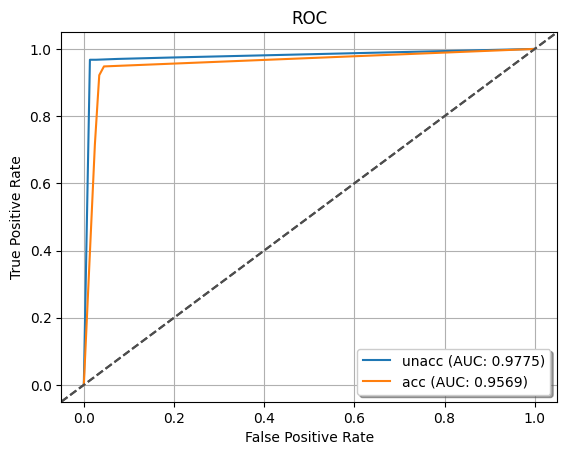

In [117]:
print_metrics_CV(data_cars, cls_cars_no_pruning, numeric=False)

> On fait maintenant la même chose pour vote.arff.

In [118]:
data_vote = loader.load_file('vote.arff')
data_vote.class_is_last()
print(data_vote)
cls_vote_no_pruning = Classifier(classname="weka.classifiers.trees.REPTree",
                    options=["-N", "3", "-P"])
cls_vote_no_pruning.build_classifier(data_vote)

@relation vote

@attribute handicapped-infants {n,y}
@attribute water-project-cost-sharing {n,y}
@attribute adoption-of-the-budget-resolution {n,y}
@attribute physician-fee-freeze {n,y}
@attribute el-salvador-aid {n,y}
@attribute religious-groups-in-schools {n,y}
@attribute anti-satellite-test-ban {n,y}
@attribute aid-to-nicaraguan-contras {n,y}
@attribute mx-missile {n,y}
@attribute immigration {n,y}
@attribute synfuels-corporation-cutback {n,y}
@attribute education-spending {n,y}
@attribute superfund-right-to-sue {n,y}
@attribute crime {n,y}
@attribute duty-free-exports {n,y}
@attribute export-administration-act-south-africa {n,y}
@attribute Class {democrat,republican}

@data
n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,democrat
n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y,democrat
n,y,n,y,y,y,n,n,n,n,n,

In [119]:
print(cls_vote_no_pruning)


REPTree

physician-fee-freeze = n
|   adoption-of-the-budget-resolution = n
|   |   synfuels-corporation-cutback = n
|   |   |   superfund-right-to-sue = n : democrat (6.14/2.03) [0/0]
|   |   |   superfund-right-to-sue = y : democrat (4.21/0.08) [0/0]
|   |   synfuels-corporation-cutback = y
|   |   |   handicapped-infants = n
|   |   |   |   crime = n : democrat (2.01/0) [0/0]
|   |   |   |   crime = y : democrat (5.11/0.05) [0/0]
|   |   |   handicapped-infants = y : democrat (8.19/0.02) [0/0]
|   adoption-of-the-budget-resolution = y
|   |   education-spending = n
|   |   |   crime = n : democrat (158.85/0.37) [0/0]
|   |   |   crime = y
|   |   |   |   handicapped-infants = n : democrat (22.37/0.53) [0/0]
|   |   |   |   handicapped-infants = y : democrat (25.52/0.06) [0/0]
|   |   education-spending = y
|   |   |   anti-satellite-test-ban = n : democrat (5.19/0.55) [0/0]
|   |   |   anti-satellite-test-ban = y
|   |   |   |   handicapped-infants = n
|   |   |   |   |   crime = n

> Les trois premières lignes permettent de descendre les premiers niveaus de l'arbre. <br>
> La ligne superfund-right-to-sue = n : democrat (6.14/2.03) [0/0] correspond à une prise de décision. <br>
>> superfund-right-to-sue: attribut avec laquelle est prise la décision.
>> democrate: décision
>> 6.14: nombre d'instances conernées. La fraction vient de la manière avec laquelle Weka gère les valeurs manquantes, comme expliqué en 3.1. <br>
>> 2.03: moyenne de l'erreur des moindres carrés.
>> [0,0]: les valeurs sont à 0 car uniquement l'élagage n'a pas été utilisé ; les ensembles growing et pruning ne font qu'un. <br>

> Les autres lignes ont des explication similaires.

> Cette fois-ci, il n'y a aucun attribut qui permet de directement classifier en democrat ou republican (l'affiliation politique est multi-factorielle !).


Correctly Classified Instances         417               95.8621 %
Incorrectly Classified Instances        18                4.1379 %
Kappa statistic                          0.9127
Mean absolute error                      0.0567
Root mean squared error                  0.1843
Relative absolute error                 11.9461 %
Root relative squared error             37.8431 %
Total Number of Instances              435     

Confusion matrix:
 [[258.   9.]
 [  9. 159.]]


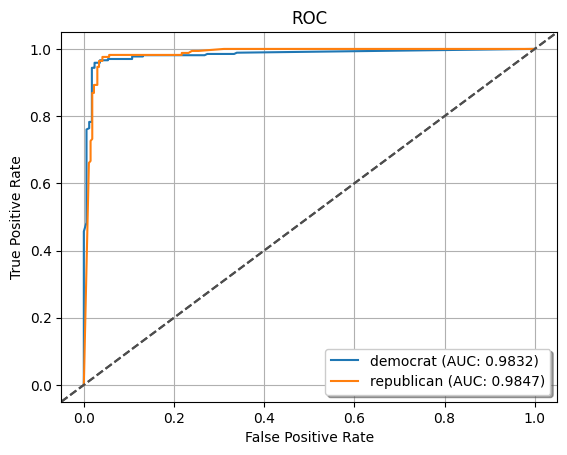

In [120]:
print_metrics_CV(data_vote, cls_vote_no_pruning, print_model=False)

> Les métriques de validation croisées sont très bonnes, il faudrait voir si le modèle généralise bien en utilisant un test set, mais ce n'est pas demandé.

#### Q2

On applique la même méthode à la base wine. <br>
Cette fois-ci il s'agit d'une régression, il n'y a donc pas de matrice de confusion ni de courbe ROC. On aura par contre le coefficient de corrélation et les erreurs de régression.

In [121]:
data_wine = loader.load_file('wine.arff')
data_wine.class_is_first()
print(data_wine)
cls_wine_no_pruning = Classifier(classname="weka.classifiers.trees.REPTree",
                    options=["-N", "3", "-P"])
cls_wine_no_pruning.build_classifier(data_wine)

@relation wine

@attribute class numeric
@attribute ' Alcohol' numeric
@attribute ' Malic acid' numeric
@attribute ' Ash' numeric
@attribute ' Alcalinity of ash  ' numeric
@attribute ' Magnesium' numeric
@attribute ' Total phenols' numeric
@attribute ' Flavanoids' numeric
@attribute ' Nonflavanoid phenols' numeric
@attribute ' Proanthocyanins' numeric
@attribute ' Folor intensity' numeric
@attribute ' Hue' numeric
@attribute ' OD280/OD315 of diluted wines' numeric
@attribute ' Proline' numeric

@data
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31

In [122]:
print(cls_wine_no_pruning)


REPTree

 Flavanoids < 1.58
|    Folor intensity < 3.83 : 2 (13/0) [0/0]
|    Folor intensity >= 3.83 : 2.98 (49/0.02) [0/0]
 Flavanoids >= 1.58
|    Proline < 724.5
|   |    Alcohol < 13.18 : 2 (50/0) [0/0]
|   |    Alcohol >= 13.18 : 1.75 (4/0.19) [0/0]
|    Proline >= 724.5
|   |    Folor intensity < 3.46 : 2 (4/0) [0/0]
|   |    Folor intensity >= 3.46 : 1 (58/0) [0/0]

Size of the tree : 11



Correlation coefficient                  0.9313
Mean absolute error                      0.082 
Root mean squared error                  0.286 
Relative absolute error                 13.1292 %
Root relative squared error             36.8325 %
Total Number of Instances              178     

Correlation coefficient: 0.9312856856631994


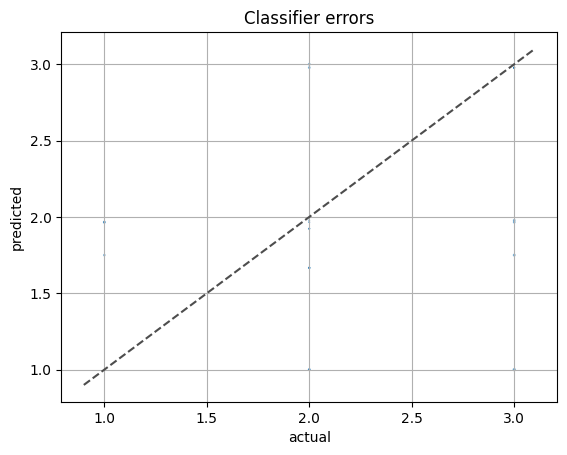

In [123]:
print_metrics_CV(data_wine, cls_wine_no_pruning, numeric=True, print_model=False)

> Pour l'affichage des erreurs, l'axe 'predicted' correspond à 'qualité prédite' et 'actual' à 'qualité'. <br>
> On a des ronds au lieu de croix. <br>
Le coefficient de corrélation 0.93 est plutôt élevé, et signifie que seulement 7% de la variance des résultats n'est pas expliquée par le modèle. <br>
> On observe effectivement plusieurs clusters pour les erreurs.